# Brain Tumor Dataset Exploratory Data Analysis (EDA)


In [7]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from PIL import Image

# Create results folder if not exists
results_dir = "results"
os.makedirs(results_dir, exist_ok=True)

# Define paths
train_path = "D:/PrediCare/data/raw/Training"



# Gather Dataset Info and Class Counts

In [8]:
class_names = sorted([c for c in os.listdir(train_path) if os.path.isdir(os.path.join(train_path, c))])
image_counts = {}

for class_name in class_names:
    class_dir = os.path.join(train_path, class_name)
    image_counts[class_name] = len([f for f in os.listdir(class_dir) if os.path.isfile(os.path.join(class_dir, f))])

df = pd.DataFrame({
    "class": list(image_counts.keys()),
    "num_images": list(image_counts.values())
})

print("Class and image counts:")
display(df)


Class and image counts:


,class,num_images
0,glioma,1321
1,meningioma,1339
2,notumor,1595
3,pituitary,1457


# Visualize Class Distribution

C:\Users\User\AppData\Local\Temp\ipykernel_14476\1434782959.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="class", y="num_images", data=df, palette="viridis")


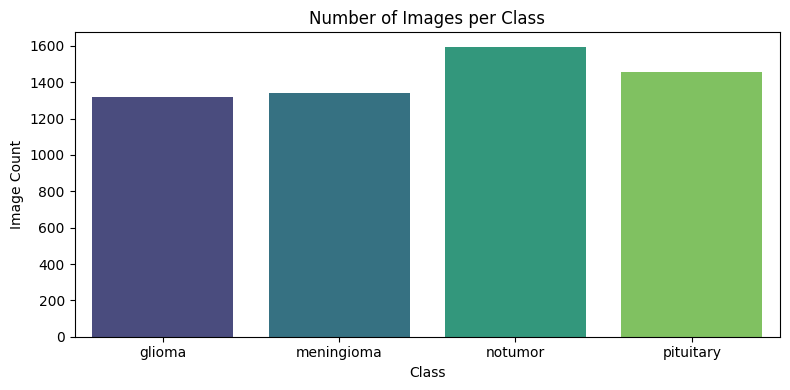

In [9]:
plt.figure(figsize=(8,4))
sns.barplot(x="class", y="num_images", data=df, palette="viridis")
plt.title("Number of Images per Class")
plt.xlabel("Class")
plt.ylabel("Image Count")
plt.tight_layout()
plt.savefig(os.path.join(results_dir, "class_distribution.png"))
plt.show()


# Sample Image Dimensions by Class

In [10]:
sample_shapes = {}
for class_name in class_names:
    class_dir = os.path.join(train_path, class_name)
    sample_image = os.path.join(class_dir, os.listdir(class_dir)[0])
    with Image.open(sample_image) as img:
        sample_shapes[class_name] = img.size  # (width, height)

print("Sample image dimensions (width x height):")
for c, shape in sample_shapes.items():
    print(f"  {c}: {shape[0]} x {shape[1]}")


Sample image dimensions (width x height):
  glioma: 512 x 512
  meningioma: 512 x 512
  notumor: 350 x 350
  pituitary: 512 x 512


# Display Sample Images from Each Class

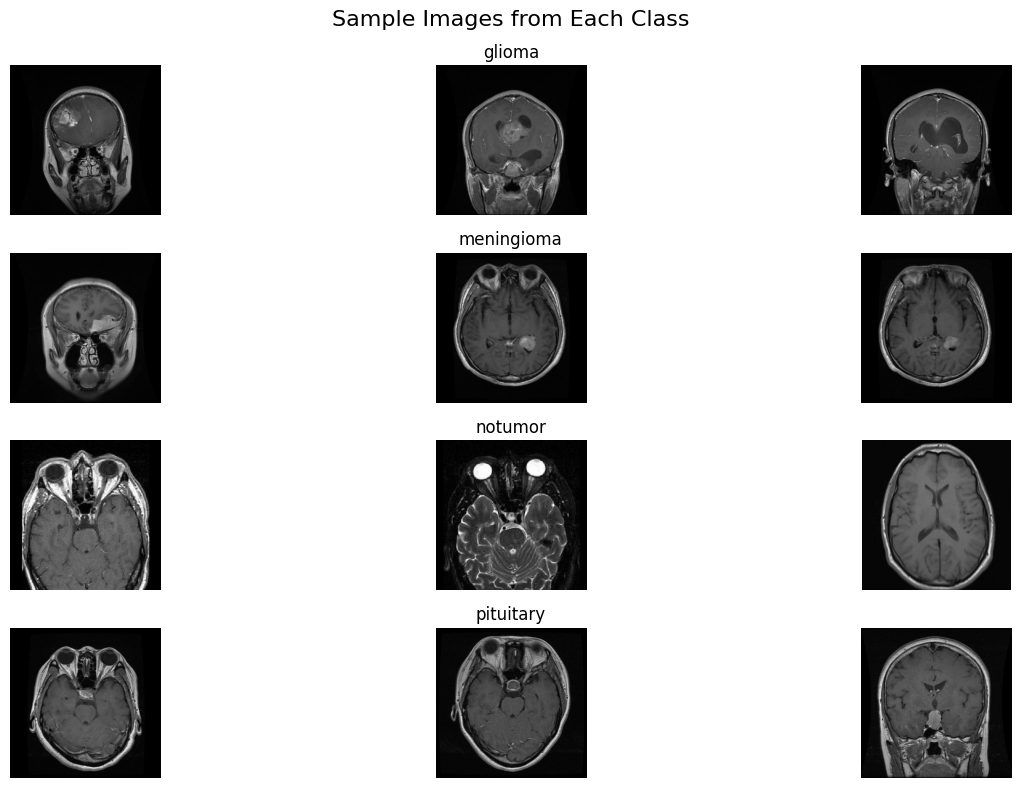

In [11]:
num_samples = 3
plt.figure(figsize=(15, 8))
for i, class_name in enumerate(class_names):
    class_dir = os.path.join(train_path, class_name)
    images = os.listdir(class_dir)[:num_samples]
    for j, img_file in enumerate(images):
        img_path = os.path.join(class_dir, img_file)
        img = Image.open(img_path)
        plt_idx = i * num_samples + j + 1
        plt.subplot(len(class_names), num_samples, plt_idx)
        plt.imshow(img)
        plt.axis('off')
        if j == 1:
            plt.title(class_name)
plt.suptitle("Sample Images from Each Class", fontsize=16)
plt.tight_layout()
plt.savefig(os.path.join(results_dir, "sample_images.png"))
plt.show()


# Pixel Intensity Distribution per Class

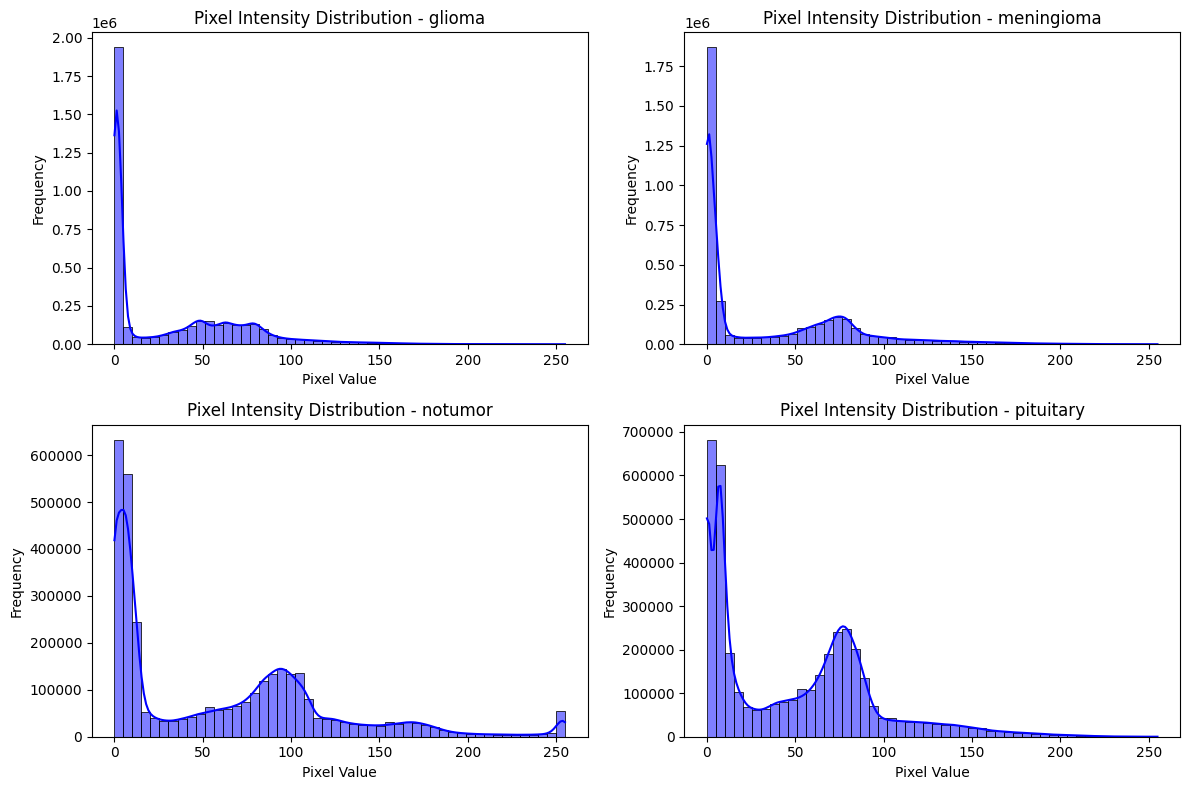

In [13]:
plt.figure(figsize=(12, 8))
for i, class_name in enumerate(class_names):
    class_dir = os.path.join(train_path, class_name)
    sample_images = os.listdir(class_dir)[:5]  # Sample 5 images per class
    pixels = []
    for img_file in sample_images:
        img_path = os.path.join(class_dir, img_file)
        img = np.array(Image.open(img_path).convert('RGB')).flatten()
        pixels.extend(img)
    plt.subplot(2, 2, i + 1)
    sns.histplot(pixels, kde=True, color='blue', bins=50)
    plt.title(f"Pixel Intensity Distribution - {class_name}")
    plt.xlabel("Pixel Value")
    plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig(os.path.join(results_dir, "pixel_intensity_distribution.png"))
plt.show()


# Correlation Heatmap of Image Dimensions

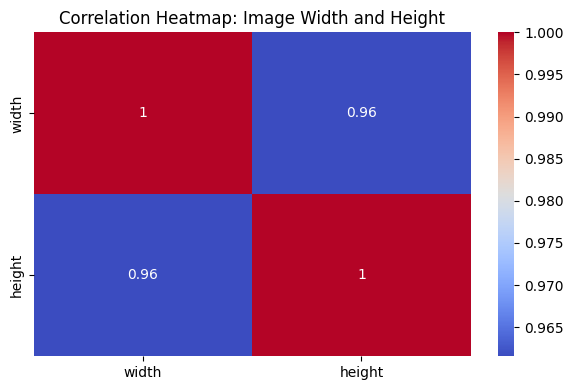

In [14]:
sizes = []
for class_name in class_names:
    class_dir = os.path.join(train_path, class_name)
    for img_file in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_file)
        with Image.open(img_path) as img:
            width, height = img.size
            sizes.append({"class": class_name, "width": width, "height": height})

sizes_df = pd.DataFrame(sizes)
corr = sizes_df[["width", "height"]].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap: Image Width and Height")
plt.tight_layout()
plt.savefig(os.path.join(results_dir, "correlation_heatmap.png"))
plt.show()


# Boxplots of Image Width and Height by Class

C:\Users\User\AppData\Local\Temp\ipykernel_14476\1388952764.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="class", y="width", data=sizes_df, palette="Set3")


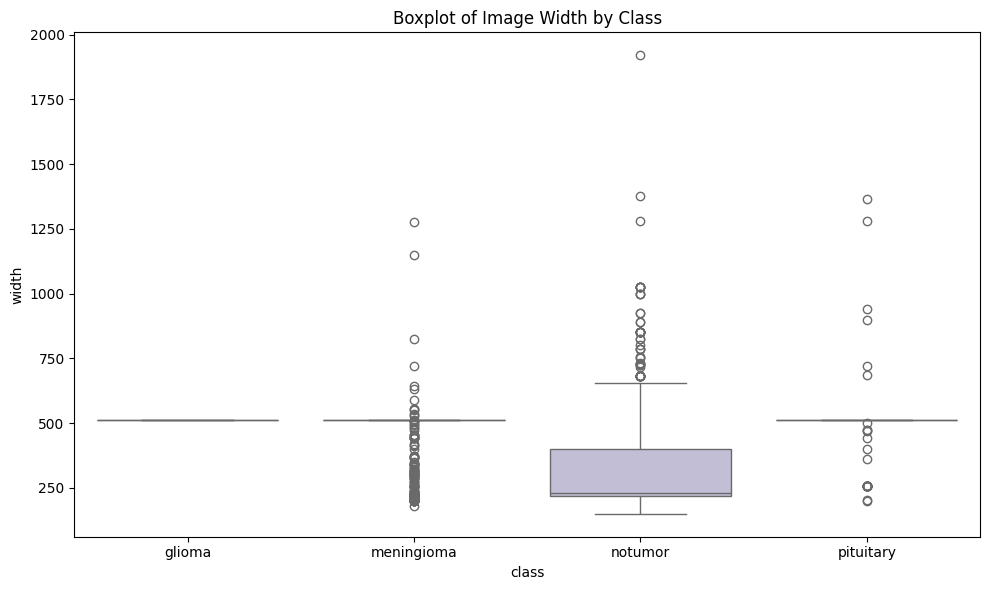

C:\Users\User\AppData\Local\Temp\ipykernel_14476\1388952764.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="class", y="height", data=sizes_df, palette="Set3")


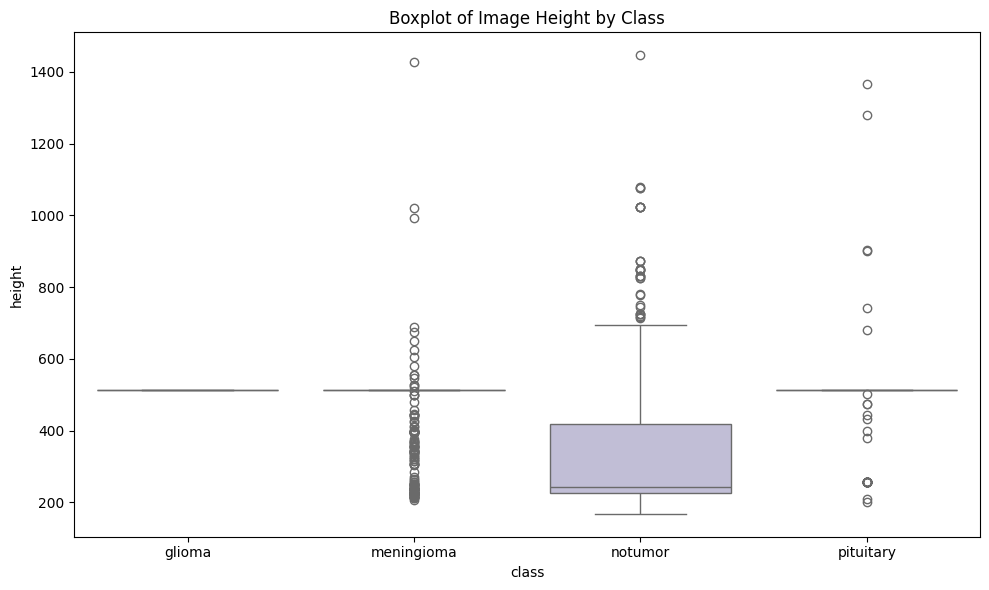

All visualizations saved in 'results' folder.


In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="class", y="width", data=sizes_df, palette="Set3")
plt.title("Boxplot of Image Width by Class")
plt.tight_layout()
plt.savefig(os.path.join(results_dir, "boxplot_width_by_class.png"))
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x="class", y="height", data=sizes_df, palette="Set3")
plt.title("Boxplot of Image Height by Class")
plt.tight_layout()
plt.savefig(os.path.join(results_dir, "boxplot_height_by_class.png"))
plt.show()

print(f"All visualizations saved in '{results_dir}' folder.")
